# Week 5 Notebook Case Study

This notebook is to provide the code for the visualizations used in the data story on plastic pollution.

This will help you to:
- review data exploration using Pandas
- review data visualization using Matplotlib
- put the visualizations in the data story according to the storyboard.

Let's say wwe have already planned the storyboard for this after some planning and research, as shown:

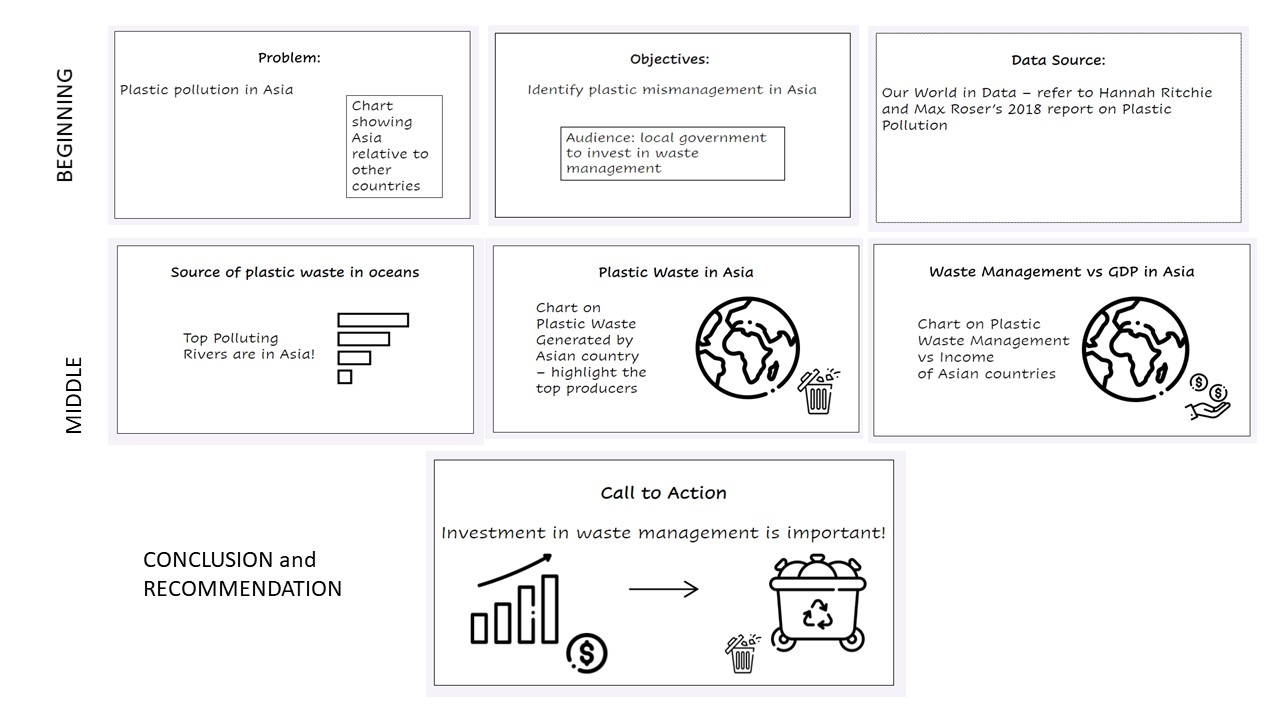

## Creating Visualizations

In order to create our visualizations, let' use the data science libraries we have learned before, `pandas`, `matplotlib` and `seaborn`. 

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Data for this notebook was compiled  from from the report on [Plastic Pollution from Our World in Data](https://ourworldindata.org/plastic-pollution). 


## Plastic Pollution in Asia

The storyboard design shows that we will start by considering plastic pollution in Asia. So we will need data specific to Asia.

First let's read in the data on plastic waste by country.

In [202]:
plastics = pd.read_csv("plastic_waste_by_country.csv")
plastics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               99 non-null     object 
 1   Code                                                 99 non-null     object 
 2   Year                                                 99 non-null     int64  
 3   Per capita plastic waste (kg/person/day)             99 non-null     float64
 4   GDP per capita, PPP (constant 2017 international $)  97 non-null     float64
 5   Population (historical estimates)                    99 non-null     int64  
 6   Per capita mismanaged plastic waste                  99 non-null     float64
 7   Continent                                            99 non-null     object 
dtypes: float64(3), int64(2), object(3)
memory usage: 6.3+ KB


We find that there are 99 rows of data for showing the amount of plastic waste, GDP and mismanaged plastic waste.
Let's have a look at the data:

In [203]:
plastics.head()


,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Per capita mismanaged plastic waste,Continent
0,Albania,ALB,2010,0.069,10749.487450,2948029,0.032,Europe
1,Algeria,DZA,2010,0.144,10970.706370,35977451,0.086,Africa
2,Angola,AGO,2010,0.062,7692.434286,23356247,0.045,Africa
3,Anguilla,AIA,2010,0.252,NaN,13436,0.010,North America
4,Antigua and Barbuda,ATG,2010,0.660,18205.738530,88030,0.051,North America


Looking at this we have data about different countries and continents. We want to focus on Asia, so we might show a comparison between the continents in terms of plastic waste generated and mismanaged. 

To recalculate the total plastic waste generated and mismanaged per day, we multiply by the population estimate for each row.


In [204]:
# Calculate total plastic generated by country, per day
plastics['Total Plastic Waste Per Day'] = plastics['Per capita plastic waste (kg/person/day)']*plastics['Population (historical estimates)']
plastics['Total Mismanaged Plastic Per Day'] = plastics['Per capita mismanaged plastic waste']*plastics['Population (historical estimates)']
plastics.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Per capita mismanaged plastic waste,Continent,Total Plastic Waste Per Day,Total Mismanaged Plastic Per Day
0,Albania,ALB,2010,0.069,10749.487450,2948029,0.032,Europe,203414.001,94336.928
1,Algeria,DZA,2010,0.144,10970.706370,35977451,0.086,Africa,5180752.944,3094060.786
2,Angola,AGO,2010,0.062,7692.434286,23356247,0.045,Africa,1448087.314,1051031.115
3,Anguilla,AIA,2010,0.252,NaN,13436,0.010,North America,3385.872,134.360
4,Antigua and Barbuda,ATG,2010,0.660,18205.738530,88030,0.051,North America,58099.800,4489.530


## Where Asia Stands

We can create the plots to show that the total mismanaged plastic is highest for Asia. In order to show the bar plots with the highest values, first, we have to sort the results.

First calculate the total waste using the `sum`, then we will create the data frame with the data that we want. 

In [205]:
# Calculate total waste for each continent

by_continent = plastics.groupby(['Continent']).sum()            # calculate for each continent
by_continent = by_continent[['Total Plastic Waste Per Day','Total Mismanaged Plastic Per Day']]  # only keep these two columns
by_continent = by_continent.sort_values(by='Total Plastic Waste Per Day', ascending=False)   # sort by highest total waste
by_continent = by_continent.reset_index()        # form back into data frame
by_continent

,Continent,Total Plastic Waste Per Day,Total Mismanaged Plastic Per Day
0,Asia,2.674115e+08,1.705323e+08
1,North America,1.261470e+08,6.850980e+06
2,Europe,1.091529e+08,3.378665e+06
3,Africa,4.776221e+07,3.247484e+07
4,South America,4.453916e+07,5.465790e+06
5,Oceania,4.183192e+06,2.809056e+05


Now we can create the plots to compare the continents by the Total Plastic Generated and Mismanaged.

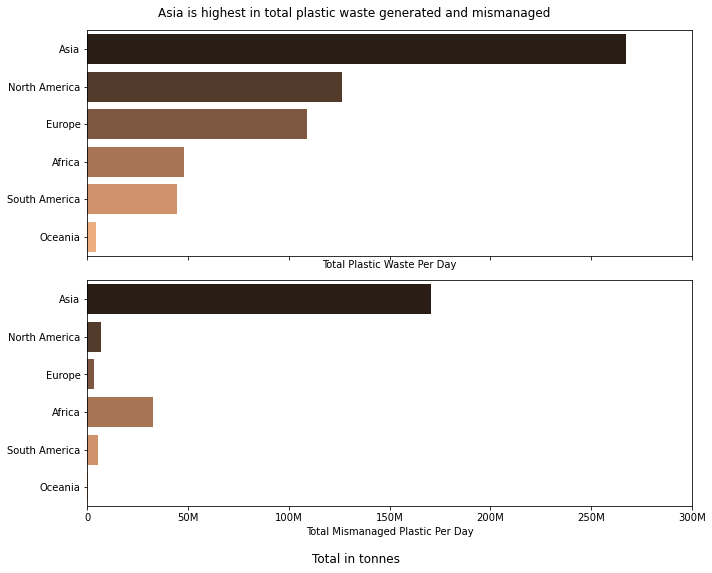

In [140]:
# Create subplots to compare 

fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(10,8))
sns.barplot(ax = ax1, data=by_continent, y='Continent', x='Total Plastic Waste Per Day', ci=None, palette='copper' )
sns.barplot(ax = ax2, data=by_continent, y='Continent', x='Total Mismanaged Plastic Per Day', ci=None, palette='copper')

ax1.set_ylabel('')
ax2.set_ylabel('')
ax2.set_xlim(right=300000000)
ax2.set_xticks([0,50000000,100000000,150000000, 200000000, 250000000, 300000000])
ax2.set_xticklabels(['0','50M', '100M','150M','200M', '250M', '300M'])

fig.suptitle('Asia is highest in total plastic waste generated and mismanaged ')
fig.supxlabel('Total in tonnes')
# use tight layout to make sure all the labels fit within the figure
plt.tight_layout()
fig.savefig("AsiaWaste.jpg")
plt.show()

## Source of Plastic Waste in Oceans

Next we want to highlight that plastic waste in oceans come from rivers, and that the top polluting rivers are in Asia.

Data on the amount of plastic emitted to rivers is also available, originally attributed to [Lebreton, L. C., Van der Zwet, J., Damsteeg, J. W., Slat, B., Andrady, A., & Reisser, J. (2017). River plastic emissions to the world’s oceans. Nature Communications, 8, 15611.](https://www.nature.com/articles/ncomms15611)

Let's read in this data too.

In [136]:
# Data on top polluting rivers
rivers = pd.read_csv("plastic-top-20-rivers.csv")
rivers

,Entity,Year,Plastic mass input from rivers (tonnes),Type
0,Africa,2015,109200,Region
1,Asia,2015,1210000,Region
2,Australia-Pacific,2015,300,Region
3,Europe,2015,3900,Region
4,South America,2015,67400,Region
5,Central & North America,2015,13400,Region
6,"Amazon (Brazil, Peru, Colombia, Ecuador)",2015,38900,River
7,Tamsui (Taiwan),2015,14700,River
8,Xi (China),2015,73900,River
9,Yangtze (China),2015,333000,River


### Top Polluting Regions 

Let's show that the Asian region has the highest amount of plastic waste from rivers, by only selecting the data for `Type`  that is 'Region'.

In [141]:
# Get the emissions for Type Region only
emission_by_region = rivers[rivers['Type']=='Region'].sort_values(by='Plastic mass input from rivers (tonnes)')
emission_by_region

,Entity,Year,Plastic mass input from rivers (tonnes),Type
2,Australia-Pacific,2015,300,Region
3,Europe,2015,3900,Region
5,Central & North America,2015,13400,Region
4,South America,2015,67400,Region
0,Africa,2015,109200,Region
1,Asia,2015,1210000,Region


Using this data, we can create a barplot to show the amount of waste emitted by rivers. 
The data from the Australia-Pacific region is very small in comparison, so it doesn't show up on the barplot. 
To emphasize, we can add the text with the amount. 

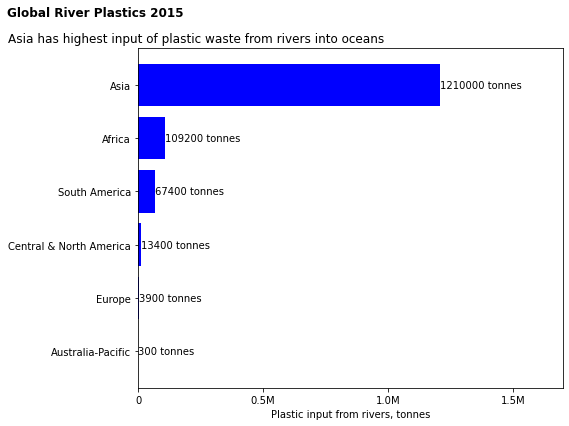

In [156]:
# Create the plot with suitable figure size for saving

fig, ax = plt.subplots(figsize=(8,6))
hbars = ax.barh(emission_by_region['Entity'], emission_by_region['Plastic mass input from rivers (tonnes)'], color="b")
ax.set_xlim(right=1700000)                  # set the x axis limit
ax.set_xlabel("Plastic input from rivers, tonnes")
ax.bar_label(hbars, fmt = "%d tonnes")              # label the values

# Label the x-axis so that it is not in scientific notation 
ax.set_xticks([0,500000,1000000,1500000])
ax.set_xticklabels(['0','0.5M', '1.0M','1.5M'])

# Add titles to describe this plot, setting x position so that it is left aligned
fig.suptitle("Global River Plastics 2015", x=0.17, fontweight = "bold")
ax.set_title("Asia has highest input of plastic waste from rivers into oceans ", x =0.14)

# use tight layout to make sure all the labels fit within the figure
plt.tight_layout()
fig.savefig("RegionalRivers.jpg")
plt.show()


### Top Polluting Rivers

Let's list the names of the rivers to emphasize that they are mostly in Asia. 

In [135]:
# Select rivers and sort
by_river =rivers[rivers['Type']=='River'].sort_values(by='Plastic mass input from rivers (tonnes)')
by_river = by_river.tail(15)       # only choose 15 of the top polluting
by_river

,Entity,Year,Plastic mass input from rivers (tonnes),Type
20,Magdalena (Colombia),2015,16700,River
24,Serayu (Indonesia),2015,17100,River
13,Dong (China),2015,19100,River
17,Imo (Nigeria),2015,21500,River
21,"Mekong (Thailand, Cambodia, Laos, China, Myanm...",2015,22800,River
25,Solo (Indonesia),2015,32500,River
18,Irrawaddy (Myanmar),2015,35300,River
22,Pasig (Philippines),2015,38800,River
11,Brantas (Indonesia),2015,38900,River
6,"Amazon (Brazil, Peru, Colombia, Ecuador)",2015,38900,River


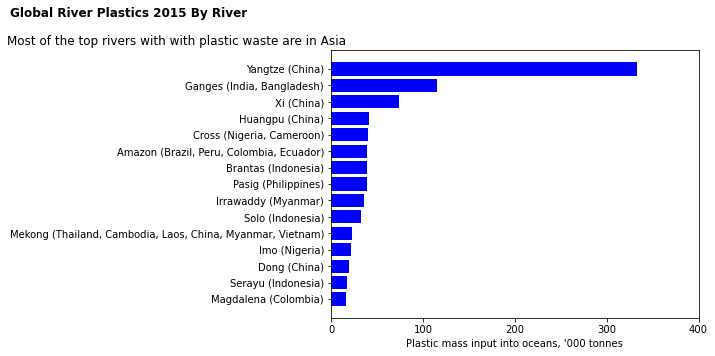

In [206]:
# Create similar plot as above 

fig, ax = plt.subplots(figsize=(10,5))
hbars = ax.barh(by_river['Entity'], by_river['Plastic mass input from rivers (tonnes)'], color="b")
ax.set_xscale("linear")
ax.set_xlim(right=400000)
ax.set_xticks([0,100000,200000,300000,400000])
ax.set_xticklabels(['0','100', '200','300','400'])
ax.set_xlabel("Plastic mass input into oceans, '000 tonnes")
fig.suptitle("Global River Plastics 2015 By River", fontweight = "bold",x=0.18)
ax.set_title("Most of the top rivers with with plastic waste are in Asia",x=-0.42)

plt.tight_layout()
fig.savefig("TopRivers.jpg")
plt.show()

## Top Producers of Plastic Waste in Asia

Now we can zoom in on which countries generate and mismanage the plastic waste in Asia. First we filter the data set to only select the Asian countries

In [192]:
# Filter to select only Asian countries
asia = plastics[plastics['Continent']=='Asia']
asia

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Per capita mismanaged plastic waste,Continent,Total Plastic Waste Per Day,Total Mismanaged Plastic Per Day
8,Bahrain,BHR,2010,0.132,44599.804970,1240864,0.016,Asia,1.637940e+05,1.985382e+04
9,Bangladesh,BGD,2010,0.034,2883.466794,147575433,0.030,Asia,5.017565e+06,4.427263e+06
15,Brunei,BRN,2010,0.026,67753.421770,388634,0.001,Asia,1.010448e+04,3.886340e+02
17,Cambodia,KHM,2010,0.066,2716.699738,14312205,0.058,Asia,9.446055e+05,8.301079e+05
22,China,CHN,2010,0.121,8884.588031,1368810604,0.092,Asia,1.656261e+08,1.259306e+08
39,Georgia,GEO,2010,0.068,9736.732094,4099095,0.035,Asia,2.787385e+05,1.434683e+05
48,Hong Kong,HKG,2010,0.398,51360.966980,6966324,0.010,Asia,2.772597e+06,6.966324e+04
50,India,IND,2010,0.010,4234.979573,1234281163,0.009,Asia,1.234281e+07,1.110853e+07
51,Indonesia,IDN,2010,0.057,8286.732870,241834226,0.047,Asia,1.378455e+07,1.136621e+07
53,Israel,ISR,2010,0.297,34800.247470,7346446,0.008,Asia,2.181894e+06,5.877157e+04


### Top Asian Countries with Mismanaged Waste

We can quickly identify the top countries by creating a scatter plot of mismanaged vs generated plastic waste. The points with higher values of mismanaged waste can be clearly seen, and we can also label the points with the country names. As there are 95 countries, we can create a list containing only specific countries to label.

We can also set the size of the point to correspond with the amount of mismanaged waste, to emphasize the value.



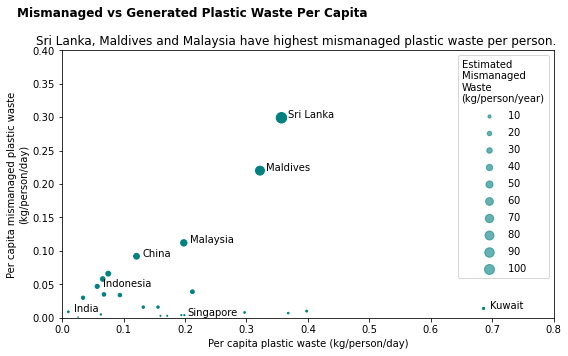

In [207]:
# Create scatter plot where the size of the point corresponds to 365 days * waste mismanaged
fig, ax = plt.subplots(figsize=(8,5))
scatter = ax.scatter(asia['Per capita plastic waste (kg/person/day)'],asia['Per capita mismanaged plastic waste'], 
                     c='teal', s=365*asia['Per capita mismanaged plastic waste'])

# find specific countries to be labelled at the points x,y 
for i in range(len(asia)):
    if asia.iloc[i,0] in {'Indonesia','Kuwait','Malaysia', 'Singapore', 'China','India','Philippines','Sri Lanka','Maldives'}:
        ax.text(x=asia.iloc[i,3]+0.01, y=asia.iloc[i,6], s=asia.iloc[i,0])       # s is the string to display   
        
# labels        
ax.set_xlabel(asia.columns[3])
ax.set_ylabel(asia.columns[6] + '\n(kg/person/day)')

# Specify the legend should show the size of the markers
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, color='teal')
legend2 = ax.legend(handles, labels, loc="upper right", title="Estimated\nMismanaged\nWaste\n(kg/person/year)")

# Figure titles
ax.set_title("Sri Lanka, Maldives and Malaysia have highest mismanaged plastic waste per person. ", x = 0.48)
ax.set_xlim(0,0.8)
ax.set_ylim(0,0.4)
fig.suptitle("Mismanaged vs Generated Plastic Waste Per Capita", x=0.34, fontweight = "bold")

# save the figure
plt.tight_layout()
fig.savefig("MismanagedVsGenerated.jpg")
plt.show()

### Comparing Waste Management with GDP

Finally we want to emphasize that countries with higher GDP per capita are usually better at managing their waste, but as countries' economies improve, waste management should be a priority. 

We will create the same plot but with the GDP per capita to compare against the mismanaged waste per capita. 

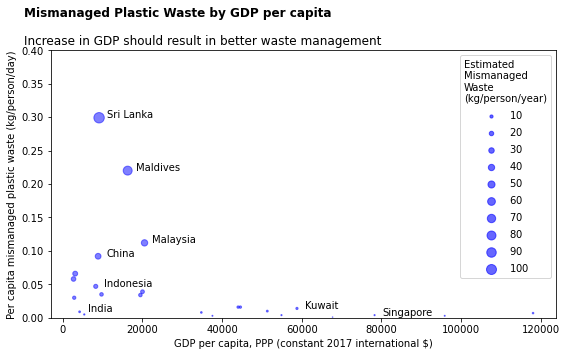

In [208]:

fig, ax = plt.subplots(figsize=(8,5))

scatter = ax.scatter(asia['GDP per capita, PPP (constant 2017 international $)'],asia['Per capita mismanaged plastic waste'], c='b', alpha = 0.5, s=365*asia['Per capita mismanaged plastic waste'])
for i in range(len(asia)):
    if asia.iloc[i,0] in {'Indonesia','Kuwait','Malaysia', 'Singapore', 'China','India','Philippines','Sri Lanka','Maldives'}:
        ax.text(asia.iloc[i,4]+2000, asia.iloc[i,6], asia.iloc[i,0])
ax.set_xlabel(asia.columns[4])
ax.set_ylabel(asia.columns[6] + ' (kg/person/day)')
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, color='b')
ax.set_ylim(0,0.4)
legend2 = ax.legend(handles, labels, loc="upper right", title="Estimated\nMismanaged\nWaste\n(kg/person/year)")
fig.suptitle("Mismanaged Plastic Waste by GDP per capita", x=0.315, fontweight = "bold")
ax.set_title("Increase in GDP should result in better waste management", x = 0.3)

# save the figure
plt.tight_layout()
fig.savefig("MismanagedvsGDP.jpg")
plt.show()

## Compiling the Report

Since we have saved all the figures in `jpg` format, you should be able to retrieve the files and use them in the data story.
Now its your turn! Consider the stories that you want to tell and design the storyboard to present your own data story.